In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
try:
    os.chdir("./drive/My Drive/RuCode/RuCode3/Рекомендации Аниме")
except Exception as e:
    print(e)
#  проверяем наличие файлов
directory = os.listdir()
directory

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['anime.csv',
 'sample_submission.csv',
 'user_ratings.csv',
 'baseline_catboost.ipynb',
 'submissions',
 'sub10.csv',
 'Решения',
 'collaborative-filtering-on-anime-data.ipynb',
 'baseline_ranking_estim.ipynb',
 'sub12.csv',
 'sub13.csv',
 'sub14.csv',
 'baseline_1.51.ipynb',
 'baseline_1.42081.ipynb',
 'sub15.csv',
 'sub16.csv']

In [ ]:
import pandas as pd
import numpy as np

anime = pd.read_csv("anime.csv")
ratings = pd.read_csv("user_ratings.csv", dtype=np.int32)
sample = pd.read_csv("sample_submission.csv")

In [ ]:
sample_new = [[int(i) for i in id.split()] for id, rat in sample.values]
sample_df = pd.DataFrame(sample_new, columns=["user_id", "Id"])

In [ ]:
from collections import Counter


def check(x):
    clear = [i for i in x if i]
    if clear:
        return np.median(clear)
    return 0


grouped_ratings = ratings.groupby("user_id").agg(lambda x: check(x))\
                         .reset_index()[["user_id", "rating"]]\
                         .rename({"rating": "rating_mean"}, axis=1)

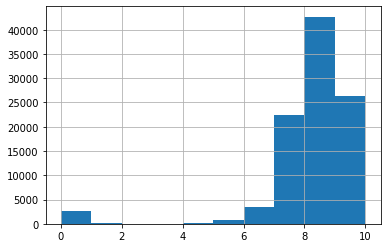

In [ ]:
grouped_ratings["rating_mean"].hist()

In [ ]:
merged = sample_df.merge(grouped_ratings, how="left", on=["user_id"])\
                         .merge(anime[["Id", "Avg score"]], how="left", on=["Id"])\
                         .replace("Unknown", np.nan)

In [ ]:
median_value = anime["Avg score"].replace("Unknown", np.nan).median() # merged["Avg score"].median()
merged["Avg score"] = merged["Avg score"].fillna(median_value).astype(np.float32)

In [ ]:
merged["rating"] = (merged["rating_mean"] + merged["Avg score"]) / 2

In [ ]:
merged.head()

,user_id,Id,rating_mean,Avg score,rating
0,0,249,8.5,7.85,8.175
1,0,4181,8.5,8.96,8.730
2,0,813,8.5,8.16,8.330
3,0,2167,8.5,8.07,8.285
4,1,1838,7.0,5.98,6.490


In [ ]:
merged.loc[merged["rating_mean"] < 2]

,user_id,Id,rating_mean,Avg score,rating
14,2,6702,0.0,7.68,3.840
15,2,20,0.0,7.91,3.955
16,2,1482,0.0,8.05,4.025
356,38,4224,0.0,8.24,4.120
357,38,223,0.0,8.00,4.000
...,...,...,...,...,...
876281,98569,431,0.0,8.67,4.335
876352,98578,36904,0.0,7.70,3.850
876353,98578,33206,0.0,8.03,4.015
876354,98578,34599,0.0,8.74,4.370


In [ ]:
arr = []
n = 0
for element in merged.values:
    rat = element[2]
    avg = element[3]
    if not rat:
        element[4] = avg
        n += 1
    arr.append(element)
merged_checked = pd.DataFrame(arr, columns=['user_id', 'Id', 'rating_mean',
                                            'Avg score', 'rating'])
merged_checked["user_id"] = merged_checked["user_id"].astype(np.int32)
merged_checked["Id"] = merged_checked["Id"].astype(np.int32)
print(n)

5832


In [ ]:
merged_checked.head()

,user_id,Id,rating_mean,Avg score,rating
0,0,249,8.5,7.85,8.175
1,0,4181,8.5,8.96,8.730
2,0,813,8.5,8.16,8.330
3,0,2167,8.5,8.07,8.285
4,1,1838,7.0,5.98,6.490


In [ ]:
merged_checked["rating"].mean()

7.853866671620544

In [ ]:
merged["rating"].mean()

7.827405299646304

In [ ]:
df_out = pd.DataFrame()
df_out["Id"] = merged_checked["user_id"].astype(str) + " " + merged_checked["Id"].astype(str)
df_out["rating"] = merged_checked["rating"]

In [ ]:
df_out.head(3)

,Id,rating
0,0 249,8.175
1,0 4181,8.730
2,0 813,8.330


In [ ]:
df_out.to_csv("sub16.csv", index=False)

In [ ]:
df_out["rating"].mean()

7.853866671620544

In [ ]:
df_out["rating"].isna().sum()

0

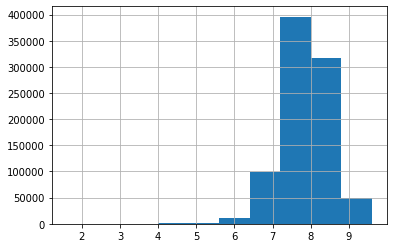

In [ ]:
df_out["rating"].hist()